<a href="https://colab.research.google.com/github/Kilvia/CNN-fashion-mnist/blob/main/CNN_dist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Modules

In [1]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn import model_selection

## GPU Setting

In [2]:
# Check if runtime type is GPU
physical_devices = tf.config.list_physical_devices('GPU')
print('Num_GPUs:{}, List:{}'.format(len(physical_devices), physical_devices))

Num_GPUs:1, List:[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
gpu_growth = False

if gpu_growth:
    physical_devices = tf.config.list_physical_devices('GPU')
    try:
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
    except:
        # Invalid device or cannot modify virtual devices once initialized.
        pass

## Dataset

Fashion Mnist

### Load Dataset

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

# Load Data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Split the train data into train and valid set
x_train, x_valid, y_train, y_valid = model_selection.train_test_split(x_train, y_train, test_size=0.2)

# Rescale data to the range 0-1
x_train, x_valid, x_test = x_train / 255.0, x_valid / 255.0, x_test / 255.0

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4422102/4422102 [==============================] - 0s 0us/step


### Data Visualization

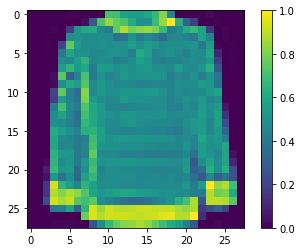

In [5]:
#Let's look at the sample data
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()
plt.grid(False)
plt.show()

### Data Shape

In [6]:
def expand(input_img):
  # Add one chanel in the end (axis=-1)
  return np.expand_dims(input_img, axis=-1)

print(f"x_train shape: {x_train.shape}")
print(f"expanded x_train shape: {expand(x_train).shape}")

x_train shape: (48000, 28, 28)
expanded x_train shape: (48000, 28, 28, 1)


In [7]:
x_train = expand(x_train)
x_valid = expand(x_valid)
x_test = expand(x_test)

print(f"""
x_train shape: {x_train.shape}
x_valid shape: {x_valid.shape}
x_test shape: {x_test.shape}
""")


x_train shape: (48000, 28, 28, 1)
x_valid shape: (12000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)



## Model

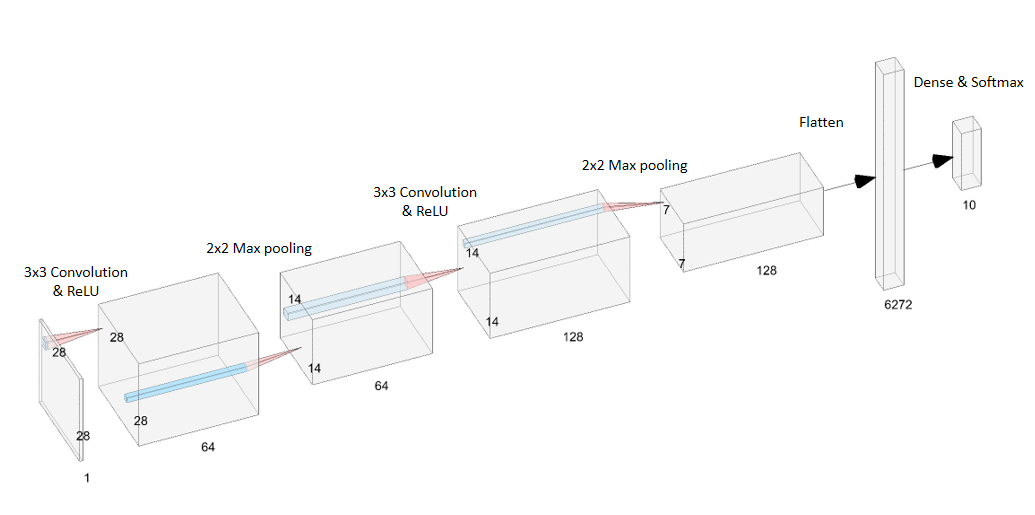

- Convolution layer, output filter size = 64, kernel size = (3,3), activation = relu
- Max pooling layer, 2x2 pooling, 2x2 strides
- Convolution layer, output filter size = 128, kernel size = (3,3), activation = relu
- Max pooling layer, 2x2 pooling, 2x2 strides
- Flatten and Dense layer, softmax activation

### Model Architecture

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', input_shape=x_train.shape[1:]),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

### Model Compile

In [10]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optim_fn = tf.keras.optimizers.Adam(learning_rate=0.001)

In [11]:
model.compile(optimizer=optim_fn,
              loss=loss_fn,
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 10)               

## Training

### Callbacks

In [13]:
checkpoint_dir = './training_checkpoints_cnn'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

def decay(epoch):
    if epoch < 3:
        return 1e-3
    elif epoch >=3 and epoch < 7:
        return 1e-4
    else:
        return 1e-5
    
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_prefix, save_weights_only = True),
    tf.keras.callbacks.LearningRateScheduler(decay)
]

### Training

In [14]:
hist = model.fit(x_train, y_train, epochs=10, callbacks=callbacks, validation_data=(x_valid, y_valid))

Epoch 1/10
1500/1500 [==============================] - 15s 4ms/step - loss: 0.4209 - accuracy: 0.8509 - val_loss: 0.3211 - val_accuracy: 0.8858 - lr: 0.0010
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2789 - accuracy: 0.8996 - val_loss: 0.3099 - val_accuracy: 0.8866 - lr: 0.0010
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2403 - accuracy: 0.9143 - val_loss: 0.2500 - val_accuracy: 0.9113 - lr: 0.0010
Epoch 4/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1770 - accuracy: 0.9379 - val_loss: 0.2276 - val_accuracy: 0.9197 - lr: 1.0000e-04
Epoch 5/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1666 - accuracy: 0.9412 - val_loss: 0.2253 - val_accuracy: 0.9206 - lr: 1.0000e-04
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1590 - accuracy: 0.9433 - val_loss: 0.2271 - val_accuracy: 0.9176 - lr: 1.0000e-04
Epoch 7/10
1500/1500 [======================

### Plot Loss and Accuracy

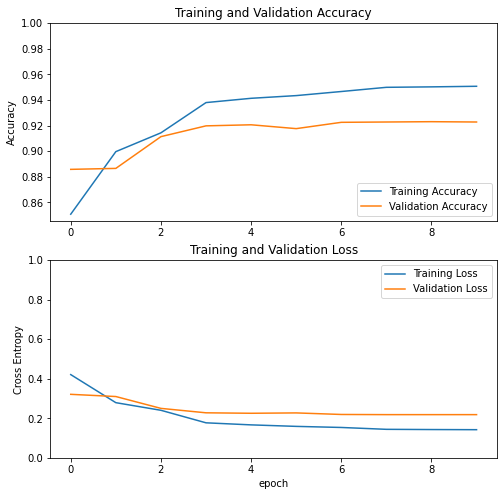

In [15]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### Model Evaluation

In [16]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2306 - accuracy: 0.9205


[0.23055823147296906, 0.9204999804496765]

In [17]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [18]:
#Plot image with label
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    img = img.reshape((28,28))
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
#Plot 
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='gray')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    _ = plt.xticks(range(10), class_names, rotation=45)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

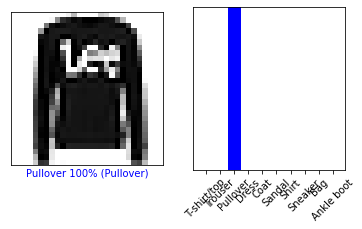

In [19]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions, y_test)
plt.show()